# 📈📉 **StarBucks Stock Price EDA** 📈📉

&emsp; Starbucks is an American company that operates the largest coffee house chain and one of the most recognizable brands in the world. Headquartered in Seattle, Washington, the company operates more than 35,000 stores across 80 countries (as of 2022).
<br>

<center><img src='https://b.zmtcdn.com/data/pictures/chains/4/43344/c30378e0ae506ced1a9c8b5b6d7edb77.png'></img></center>
<br>

&emsp; Starbucks was founded in 1971 by Jerry Baldwin, Zev Siegl, and Gordon Bowker, who were inspired to sell high-quality coffee beans and equipment by coffee roasting entrepreneur Alfred Peet. Starbucks dominance among coffee retailers can be traced to several key strategic initiatives and competitive advantages, including promotion of coffee as a social and cultural experience, focus on the quality of its coffee beverages and the ambiance of its coffeehouse environment, and first-mover advantage in the café market.


&emsp;**The company has a market cap of 105.27 billion dollars and annual revenue of 35.98 billion dollars.**



## **Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
info_lib = {
    'Library' : ['Pandas', 'Numpy', 'Matplotlib'],
    'Short Description' : ['''Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.''',
                           '''Numpy is the fundamental package for scientific computing with Python.''',
                           '''Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.''']
}


print('Information about loaded libraries. \n')


info_lib_df = pd.DataFrame(info_lib, columns = ['Library', 'Short Description'])


info_lib_df = info_lib_df.style.set_table_styles([{'selector' : 'th',
                                                   'props' : 'background-color : #99FF00; font-size : 14pt; color: black'}])


pd.set_option('display.max_colwidth', 400)
info_lib_df

Information about loaded libraries. 



,Library,Short Description
0,Pandas,"Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."
1,Numpy,Numpy is the fundamental package for scientific computing with Python.
2,Matplotlib,"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."


## **Loading the Dataset** ....

In [3]:

stardf = pd.read_csv('SBUX.csv')

stardf_up = stardf.head()

# print(type(stardf))
stardf_up = stardf_up.style.set_table_styles([{'selector' : 'th',
                                            'props' : 'background-color : #99FF00 ; font-size : 14pt; color: black'}])

stardf_up


,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800


## **Information about dataset**

#### **Description about each column of Datasets**

In [4]:

star_col_list = stardf.columns.to_list()

col_list = {
    'Column Names' : star_col_list,
    'Short Description' : ['This column consists of all the dates on which the stocks of Starbucks were traded.',
                           'This column consists of all opening prices of stock.',
                           'This column consists of all the High prices for a particular trading day',
                           'This column consists of all lowest prices for a particular trading day',
                           'This column consists of all closing prices of stock.',
                           'Adjusted closing price is a financial term referring to a stock’s closing price on a particular day, which has been modified to account for corporate actions that could affect the stock’s value.',
                           'Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a trading day.']
}

star_col = pd.DataFrame(col_list, columns = ['Column Names', 'Short Description'])

star_col_up = star_col.style.set_table_styles([{'selector' : 'th',
                                                'props' : 'background-color : #9EA5FF; font-size : 14pt; color: black'}])

star_col_up


,Column Names,Short Description
0,Date,This column consists of all the dates on which the stocks of Starbucks were traded.
1,Open,This column consists of all opening prices of stock.
2,High,This column consists of all the High prices for a particular trading day
3,Low,This column consists of all lowest prices for a particular trading day
4,Close,This column consists of all closing prices of stock.
5,Adj Close,"Adjusted closing price is a financial term referring to a stock’s closing price on a particular day, which has been modified to account for corporate actions that could affect the stock’s value."
6,Volume,"Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a trading day."


In [5]:

star_info = stardf.info()

star_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7919 non-null   object 
 1   Open       7919 non-null   float64
 2   High       7919 non-null   float64
 3   Low        7919 non-null   float64
 4   Close      7919 non-null   float64
 5   Adj Close  7919 non-null   float64
 6   Volume     7919 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 433.2+ KB


#### **Statistical Description about Dataset**

In [6]:

star_desc = stardf.describe()

star_desc_up = star_desc.style.set_table_styles([{'selector' : 'th',
                                                  'props' : 'background-color : #FFF78C; font-size : 14pt; color: black'}])

star_desc_up


,Open,High,Low,Close,Adj Close,Volume
count,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000
mean,29.167637,29.458891,28.872252,29.173403,26.102653,14777568.405102
std,33.045900,33.335687,32.749218,33.048777,31.446692,13459303.043632
min,0.328125,0.347656,0.320313,0.335938,0.264262,1504000.000000
25%,4.323750,4.447500,4.224531,4.330312,3.406388,7882600.000000
50%,13.090000,13.240000,12.957500,13.095000,10.328559,11794600.000000
75%,54.330002,54.745001,53.919998,54.410000,47.360496,17866000.000000
max,126.080002,126.320000,124.809998,126.059998,119.621147,585508800.000000


## **Checking for null values in the dataset**

In [7]:
star_null_dict = stardf.isnull().sum().to_dict()

star_null_df = pd.DataFrame([star_null_dict])

star_null_df_up = star_null_df.style.set_table_styles([{'selector' : 'th',
                                      'props' : 'background-color : #99FFB1; font-size : 14pt; color: black'}],
                                    [{'selector' : 'tr',
                                      'props' :  'font-size:13px'}])

star_null_df_up

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,0,0,0,0,0


## **Data Preprocessing**

In [8]:
total_data = stardf['Date'].count()

MinDate = min(stardf['Date'])
MaxDate = max(stardf['Date'])

Info_mat = {
    "Total Rows":[total_data],
    "Start Date": [MinDate],
    "End Date":[MaxDate],
    "Total Years" : [2023 - 1992]
}

Info_mat_df = pd.DataFrame(Info_mat, columns = ["Total Rows", "Start Date", "End Date", "Total Years"])

Info_mat_df_up = Info_mat_df.style.set_table_styles([{'selector' : 'th',
                                                      'props' : 'background-color : #99FFB1: font-size: 16pt; color: black'}])

Info_mat_df_up

,Total Rows,Start Date,End Date,Total Years
0,7919,1992-06-26,2023-12-05,31


We have data for 7919 trading sessions of **StarBuck's Stocks price** starting from **1992-06-26** to **2023-12-05**.

In [9]:
### Adding Year Column

Year = []

for i in range(stardf['Date'].count()):
  s = stardf['Date'].astype('string')[i].split('-')[0]
  Year.append(s)

stardf['Year'] = Year

stardf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400,1992
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800,1992
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600,1992
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800,1992
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800,1992


### **Separating Records Year-wise**

In [10]:
def CreateCondFrame(Dataframe, Frame:str, Year:str):
  '''
    The Function is made for separating year-wise  records in the Stardf (Dataset).

    Inputs:
      Dataframe --> It is the dataset on which is function is going to act.

      Frame --> The Year column based on which the records will be separated.
                Note: You Need to provide this column in string format.

      Year --> This is the separation condition. Provide the year for which you need to separate the records.
               Note: You need to provide this attribute in the string format and not in int.

      Output:
        The Function will return the new Dataframe created based on your given inputs.

  '''

  newFrame = Dataframe.loc[Dataframe[Frame] == Year]
  return newFrame


# ------------------------------------------------------------------------------------------------------------------------------------


star_1992_df = CreateCondFrame(stardf, 'Year', '1992')
star_1993_df = CreateCondFrame(stardf, 'Year', '1993')
star_1994_df = CreateCondFrame(stardf, 'Year', '1994')
star_1995_df = CreateCondFrame(stardf, 'Year', '1995')
star_1996_df = CreateCondFrame(stardf, 'Year', '1996')
star_1997_df = CreateCondFrame(stardf, 'Year', '1997')
star_1998_df = CreateCondFrame(stardf, 'Year', '1998')
star_1999_df = CreateCondFrame(stardf, 'Year', '1999')
star_2000_df = CreateCondFrame(stardf, 'Year', '2000')
star_2001_df = CreateCondFrame(stardf, 'Year', '2001')
star_2002_df = CreateCondFrame(stardf, 'Year', '2002')
star_2003_df = CreateCondFrame(stardf, 'Year', '2003')
star_2004_df = CreateCondFrame(stardf, 'Year', '2004')
star_2005_df = CreateCondFrame(stardf, 'Year', '2005')
star_2006_df = CreateCondFrame(stardf, 'Year', '2006')
star_2007_df = CreateCondFrame(stardf, 'Year', '2007')
star_2008_df = CreateCondFrame(stardf, 'Year', '2008')
star_2009_df = CreateCondFrame(stardf, 'Year', '2009')
star_2010_df = CreateCondFrame(stardf, 'Year', '2010')
star_2011_df = CreateCondFrame(stardf, 'Year', '2011')
star_2012_df = CreateCondFrame(stardf, 'Year', '2012')
star_2013_df = CreateCondFrame(stardf, 'Year', '2013')
star_2014_df = CreateCondFrame(stardf, 'Year', '2014')
star_2015_df = CreateCondFrame(stardf, 'Year', '2015')
star_2016_df = CreateCondFrame(stardf, 'Year', '2016')
star_2017_df = CreateCondFrame(stardf, 'Year', '2017')
star_2018_df = CreateCondFrame(stardf, 'Year', '2018')
star_2019_df = CreateCondFrame(stardf, 'Year', '2019')
star_2020_df = CreateCondFrame(stardf, 'Year', '2020')
star_2021_df = CreateCondFrame(stardf, 'Year', '2021')
star_2022_df = CreateCondFrame(stardf, 'Year', '2022')
star_2023_df = CreateCondFrame(stardf, 'Year', '2023')

star_2023_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
7686,2023-01-03,100.559998,101.169998,99.470001,100.830002,98.757988,6607700,2023
7687,2023-01-04,102.690002,104.730003,102.550003,104.459999,102.313393,8166600,2023
7688,2023-01-05,104.489998,105.099998,103.489998,104.430000,102.284004,5575100,2023
7689,2023-01-06,105.379997,107.000000,105.010002,106.690002,104.497559,9644100,2023
7690,2023-01-09,106.519997,106.680000,104.430000,104.739998,102.587639,10124800,2023
...,...,...,...,...,...,...,...,...
7914,2023-11-29,101.510002,101.690002,99.529999,99.849998,99.849998,8428500,2023
7915,2023-11-30,100.059998,100.120003,98.419998,99.300003,99.300003,11442600,2023
7916,2023-12-01,98.500000,99.279999,97.519997,99.199997,99.199997,12503900,2023
7917,2023-12-04,98.389999,98.879997,96.769997,97.599998,97.599998,11477400,2023


### **Concatenating separated records in a 10 year time frame.**

In [11]:
def ConcatDataFrames(frames:list):
  '''
    This Function is made to concatenate multiple sub-dataframes into a single DataFrames.

    Inputs:
      frames --> It is the list of all the sub-dataframes which are to be concatenated together.

    Output:
      It returns a new dataframe after concatenation.
  '''

  new_frame = pd.concat(frames,
                        ignore_index = True)
  return new_frame


# --------------------------------------------------------------------------------------------------------------------------------------

star_92_01_df = ConcatDataFrames([star_1992_df,
                                  star_1993_df,
                                  star_1994_df,
                                  star_1995_df,
                                  star_1996_df,
                                  star_1997_df,
                                  star_1998_df,
                                  star_1999_df,
                                  star_2000_df,
                                  star_2001_df])

star_02_11_df = ConcatDataFrames([star_2002_df,
                                  star_2003_df,
                                  star_2004_df,
                                  star_2005_df,
                                  star_2006_df,
                                  star_2007_df,
                                  star_2008_df,
                                  star_2009_df,
                                  star_2010_df,
                                  star_2011_df])

star_12_23_df = ConcatDataFrames([star_2012_df,
                                  star_2013_df,
                                  star_2014_df,
                                  star_2015_df,
                                  star_2016_df,
                                  star_2017_df,
                                  star_2018_df,
                                  star_2019_df,
                                  star_2020_df,
                                  star_2021_df,
                                  star_2022_df,
                                  star_2023_df])

star_12_23_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2012-01-03,23.424999,23.520000,22.639999,22.645000,18.330662,12922400,2012
1,2012-01-04,22.705000,23.315001,22.639999,23.084999,18.686829,13886800,2012
2,2012-01-05,23.094999,23.200001,22.775000,23.180000,18.763729,9731800,2012
3,2012-01-06,23.190001,23.455000,23.115000,23.360001,18.909441,8105400,2012
4,2012-01-09,23.365000,23.400000,23.135000,23.295000,18.856823,7261600,2012
...,...,...,...,...,...,...,...,...
2996,2023-11-29,101.510002,101.690002,99.529999,99.849998,99.849998,8428500,2023
2997,2023-11-30,100.059998,100.120003,98.419998,99.300003,99.300003,11442600,2023
2998,2023-12-01,98.500000,99.279999,97.519997,99.199997,99.199997,12503900,2023
2999,2023-12-04,98.389999,98.879997,96.769997,97.599998,97.599998,11477400,2023


## **A smaller look over Starbucks stock's performance over the year.**

Before moving on to EDA, let us take a small visualisation of the prices of Starbucks stocks over its whole period.

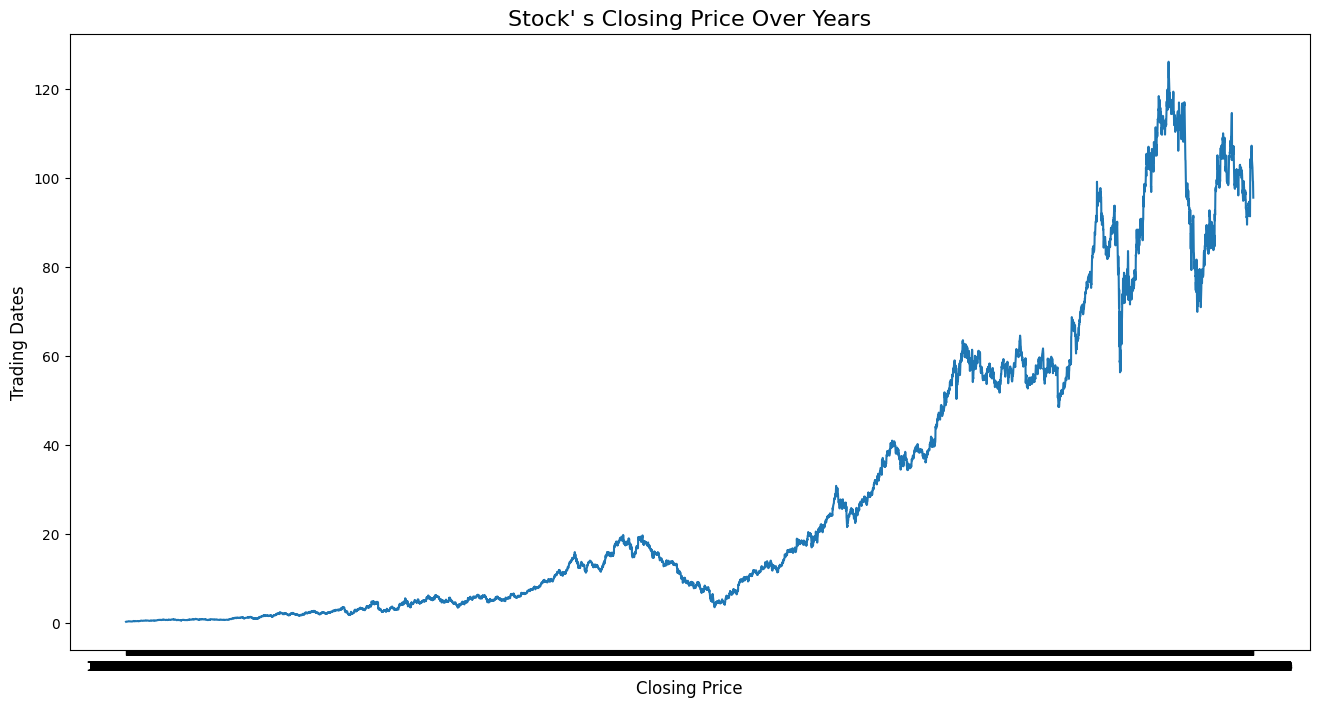

In [12]:
plt.style.use('default')

plt.figure(figsize = (16, 8))

plt.plot(stardf['Date'],
         stardf['Close'])

plt.title('Stock\' s Closing Price Over Years',
          fontsize = 16)

plt.xlabel('Closing Price',
           fontsize = 12)

plt.ylabel('Trading Dates',
           fontsize = 12)

plt.show()

As of **2023-12-05**, the stocks are still lower than its all-time high price, but in the period of almost 30 years, it has generated wealth for its investors.

## **Total Profit/Loss Over 10 Years time span.**


In [13]:
def Cal_10_P_L(DataFrame, Col:str) -> int:
  '''
    This Function is made to Calculate the Profit/Loss based on the column of User's Choice.

    Inputs:
      1. DataFrame --> It is the dataset on which is function is going to act.

      2. Col --> It is the name of that column, which will be taken into consideration for calculating the Profit/Loss.
                 Note: Provide the column name in the string format.

    Output:
      It returns the Profit/Loss rounded up to 4 decimal points.

  '''

  total_rows = DataFrame[Col].count()

  First_10 = DataFrame[Col].iloc[total_rows-1] - DataFrame[Col].iloc[0]
  return First_10.round(4)

# ----------------------------------------------------------------------------------------------------------------------------------------------------

def Get_max_min(DataFrame, Col:str, Condition:str) -> int:
  '''
    This Function is Created for calculating the Maximum and Minimum value of the stocks based on User's choice of column.

    Inputs:
      1. DataFrame --> It is the dataset on which is function is going to act.

      2. Col --> It is the name of that column, which will be taken into consideration for calculating the Minimum or Maximum Value of the stock.
                 Note: Provide the column name in the string format.

      3. Condition --> In this, you need to provide `Min` for Minimum value of the stock and `Max` for Maximum Value of the stock.

    Output:
      It returns the Maximum/Minimum Value of the stock rounded up to 4 decimal points.

  '''

  if(Condition.upper() == "MAX"):
    return max(DataFrame[Col].round(4))

  elif (Condition.upper() == 'MIN'):
    return min(DataFrame[Col].round(4))

# ---------------------------------------------------------------------------------------------------------------------------------------------------


Star_92_01_P_L = Cal_10_P_L(star_92_01_df, 'Close')
Star_92_01_Max = Get_max_min(star_92_01_df, 'Close', 'Max')
Star_92_01_Min = Get_max_min(star_92_01_df, 'Close', 'Min')

Star_02_11_P_L = Cal_10_P_L(star_02_11_df, 'Close')
Star_02_11_Max = Get_max_min(star_02_11_df, 'Close', 'Max')
Star_02_11_Min = Get_max_min(star_02_11_df, 'Close', 'Min')

Star_12_23_P_L = Cal_10_P_L(star_12_23_df, 'Close')
Star_12_23_Max = Get_max_min(star_12_23_df, 'Close', 'Max')
Star_12_23_Min = Get_max_min(star_12_23_df, 'Close', 'Min')

Info_St = {
    'Profit/Loss' : [Star_92_01_P_L, Star_02_11_P_L, Star_12_23_P_L],
    'Maximum Price' : [Star_92_01_Max, Star_02_11_Max, Star_12_23_Max],
    'Minimum Price' : [Star_92_01_Min, Star_02_11_Min, Star_12_23_Min]
}

Star_info_st = pd.DataFrame(Info_St, columns = ['Profit/Loss', 'Maximum Price', 'Minimum Price'])
Star_info_st_up = Star_info_st.style.set_table_styles([{'selector':'th',
                                                    'props':'background-color: #99FFB1; font-size:14pt; color: black'}])
Star_info_st_up

,Profit/Loss,Maximum Price,Minimum Price
0,4.426600,6.250000,0.335900
1,18.127500,23.225000,3.585000
2,72.895000,126.060000,21.580000


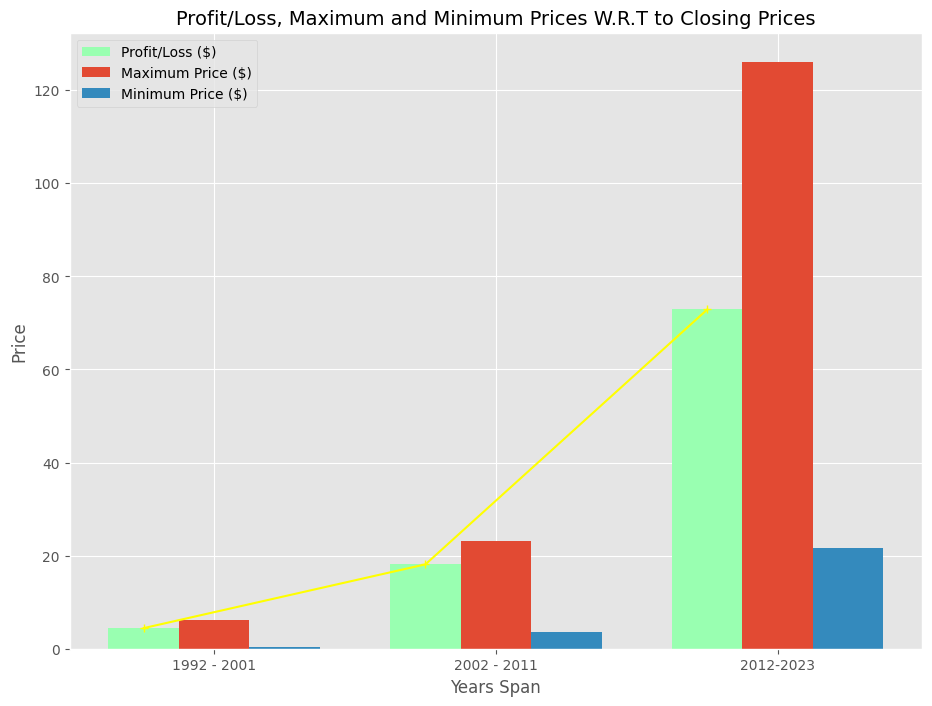

In [14]:
plt.style.use('ggplot')

plt.figure(figsize = (11, 8))

x = ['1992 - 2001', '2002 - 2011', '2012-2023']
y = [Star_info_st['Profit/Loss'], Star_info_st['Maximum Price'], Star_info_st['Minimum Price']]

values = np.arange(len(x))

width = 0.25

plt.plot(values-width,
         y[0],
         color = 'yellow',
         marker = '+')

plt.bar(values - width,
        y[0],
        label = 'Profit/Loss ($)',
        color = '#99FFB1',
        width = width)

plt.bar(values,
        y[1],
        label = 'Maximum Price ($)',
        width = width)

plt.bar(values + width,
        y[2],
        label = 'Minimum Price ($)',
        width = width)

plt.legend()

plt.xticks(values, x)

plt.title('Profit/Loss, Maximum and Minimum Prices W.R.T to Closing Prices', fontsize = 14)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Years Span', fontsize = 12)

plt.show()

&emsp; By taking into account the closing prices of Starbucks stocks, we can see that, the Profit on the stocks has seen a mild increase from 1992-2001 to 2002-2011. But it gave robust profit in the time span of 2012-2023.

&emsp; Also, the difference between the maximum and minimum value of stocks has always been higher in all the 3 decades. This shows that the stock has been performing constantly well in the markets.


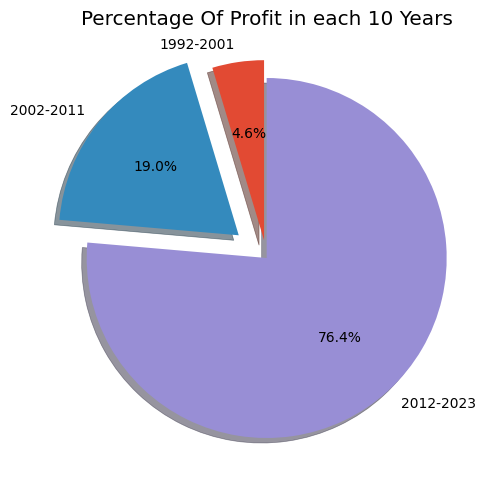

In [15]:
plt.style.use('ggplot')

x = ['1992-2001', '2002-2011', '2012-2023']
y = [Star_92_01_P_L, Star_02_11_P_L, Star_12_23_P_L]

explode = [0.1,0.2, 0]

plt.pie(y,
        labels = x,
        autopct = '%1.1f%%',
        shadow = True,
        explode = explode,
        startangle = 90)

plt.tight_layout()

plt.title('Percentage Of Profit in each 10 Years')

plt.show()


## Highest Price of the Starbucks Stocks Over 10 Years time spans

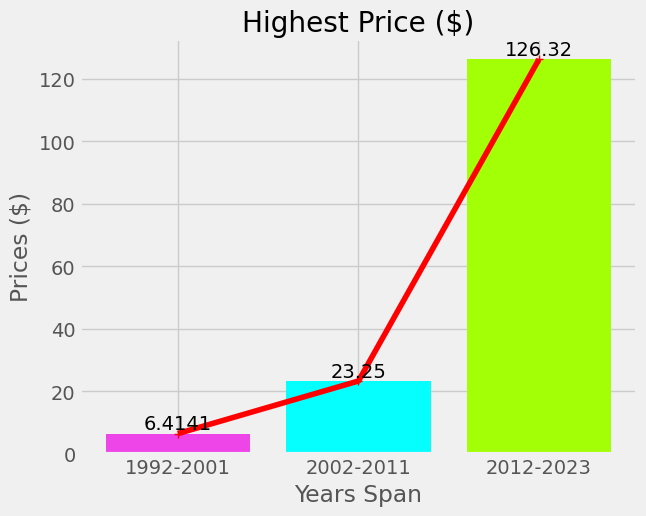

In [16]:
star_92_01_High_df = Get_max_min(star_92_01_df, 'High', 'Max')
star_02_11_High_df = Get_max_min(star_02_11_df, 'High', 'Max')
star_12_23_High_df = Get_max_min(star_12_23_df, 'High', 'Max')

plt.style.use('fivethirtyeight')

x = ['1992-2001', '2002-2011', '2012-2023']
y = [star_92_01_High_df, star_02_11_High_df, star_12_23_High_df]

plt.plot(x,
            y,
            marker = '+',
            color = 'red')

plt.bar(x,
        y,
        color = ['#ED45E8', '#05FFFF', '#A3FF05'])

plt.tight_layout()

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')

plt.title('Highest Price ($)')
plt.xlabel('Years Span')
plt.ylabel('Prices ($)')

plt.show()

* In the first Decade, the highest price that the stock attained was nearly $ 6.4141.

* In the second Decade, the highest price that the stock attained was nearly $ 23.25, which is 3.2X of the first Decade.

* In the third Decade, the highest price that the stock attained was nearly $ 126.32, which is 5.4X of the second decade and 19.6X of the first decade.

🎯 This showed that the investors’ trust started to improve during 2002-2011 and that trust has been improving since then which is reflected in the stock prices.


## Lowest Price of the Starbucks Stocks Over 10 Years time spans

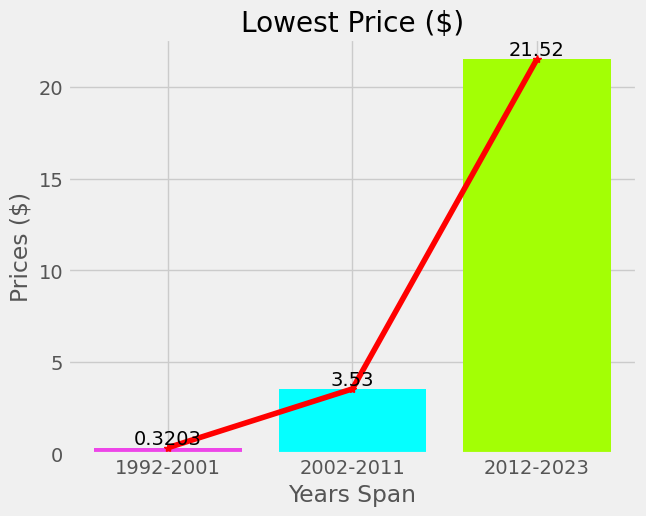

In [17]:
star_92_01_Min_df = Get_max_min(star_92_01_df, 'Low', 'Min')
star_02_11_Min_df = Get_max_min(star_02_11_df, 'Low', 'Min')
star_12_23_Min_df = Get_max_min(star_12_23_df, 'Low', 'Min')

plt.style.use('fivethirtyeight')

x = ['1992-2001', '2002-2011', '2012-2023']
y = [star_92_01_Min_df, star_02_11_Min_df, star_12_23_Min_df]

plt.plot(x,
         y,
         color = 'red',
         marker = '*')

plt.bar(x,
        y,
        color = ['#ED45E8', '#05FFFF', '#A3FF05'])

plt.tight_layout()

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')

plt.title('Lowest Price ($)')
plt.xlabel('Years Span')
plt.ylabel('Prices ($)')

plt.show()

## Volume of Starbucks Stocks

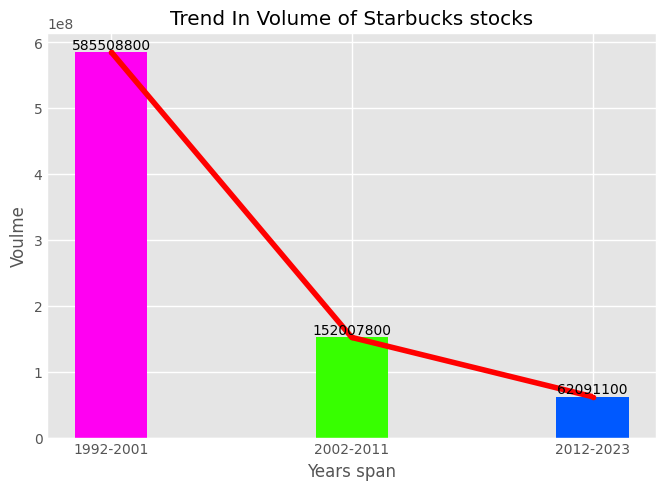

In [18]:
star_92_01_vol_max_df = Get_max_min(star_92_01_df, 'Volume', 'Max')
star_02_11_vol_max_df = Get_max_min(star_02_11_df, 'Volume', 'Max')
star_12_23_vol_max_df = Get_max_min(star_12_23_df, 'Volume', 'Max')

plt.style.use('ggplot')

plt.figure(figsize = (7,5))

x = ['1992-2001', '2002-2011', '2012-2023']
y = [star_92_01_vol_max_df, star_02_11_vol_max_df, star_12_23_vol_max_df]

plt.bar(x,
        y,
        color = ['#FF00F2', '#37FF00', '#0059FF'],
        width = 0.3)

plt.plot(x,
         y,
         marker = ".",
         color = 'red')

plt.title('Trend In Volume of Starbucks stocks')
plt.xlabel('Years span')
plt.ylabel('Voulme')

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')

plt.show()


&emsp; After looking at the prices and profits booked on this stock, one would think that stocks would have garnered higher trading volume all the decades.

&emsp; But with the picture above, the case is different. The highest volume in a single trading session has seen a substantial decrease in all the 3 decades.

&emsp; When stock volume starts to decrease, it can signal that investors are less enthusiastic about a company. Now this scenario can be due to multiple reasons like higher value of the stock, uncertainty in the markets or liquidity issues.


## Average Open, Close and Volume of Starbucks Stocks Price

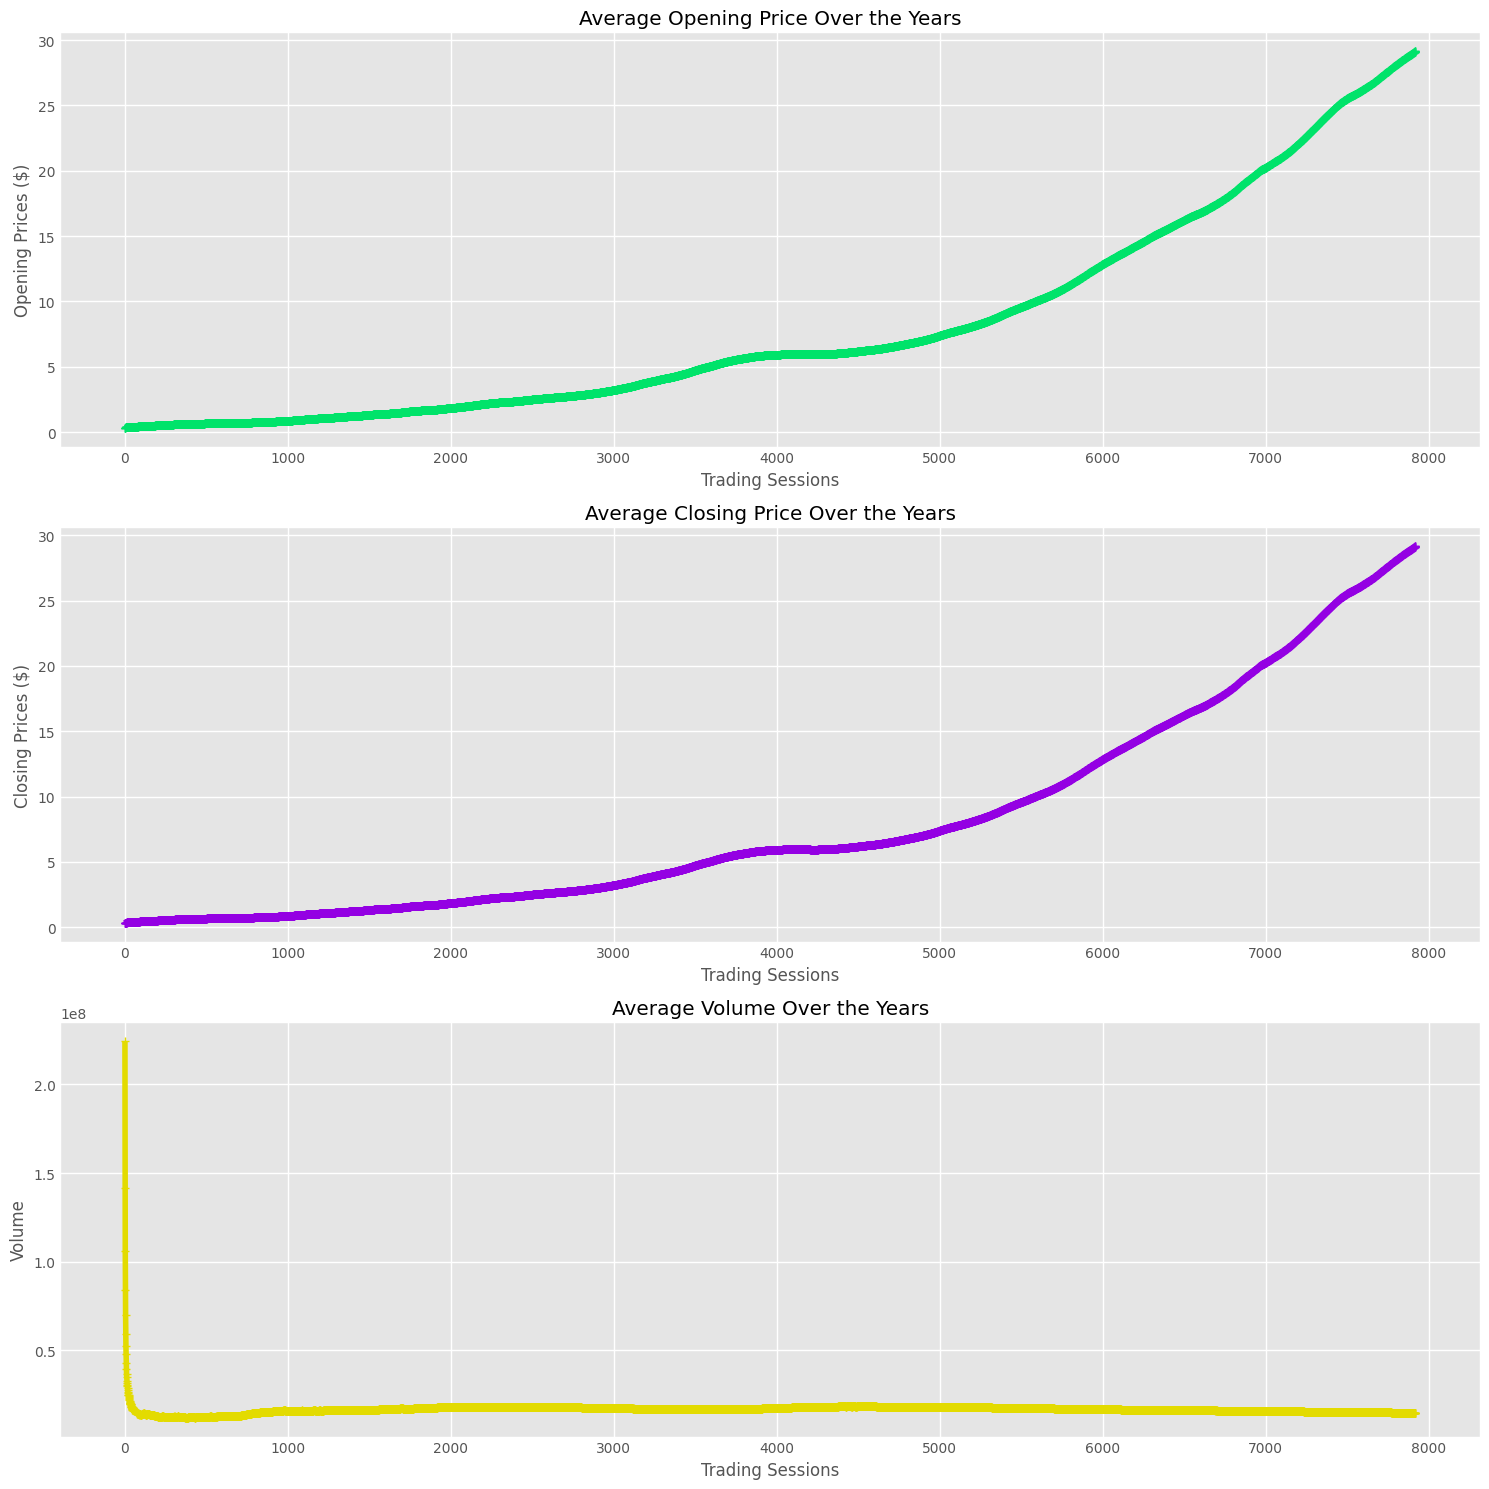

In [19]:
close = []
vol = []
open = []

# plt.figure(figsize = (10, 7))

plt.style.use('ggplot')

for i in range(stardf['Date'].count()):
  c = stardf['Close'][:i].mean(axis = 0)
  v = stardf['Volume'][:i].mean(axis = 0)
  o = stardf['Open'][:i].mean(axis = 0)
  close.append(c)
  vol.append(v)
  open.append(o)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.plot(open,
         color = '#00E36A',
         marker = '+')
ax1.title.set_text("Average Opening Price Over the Years")
ax1.set_xlabel('Trading Sessions')
ax1.set_ylabel('Opening Prices ($)')

ax2.plot(close,
         color = '#9400E3',
         marker = '+')
ax2.title.set_text("Average Closing Price Over the Years")
ax2.set_xlabel('Trading Sessions')
ax2.set_ylabel('Closing Prices ($)')

ax3.plot(vol,
         color = '#E3DB00',
         marker = '+')
ax3.title.set_text("Average Volume Over the Years")
ax3.set_xlabel('Trading Sessions')
ax3.set_ylabel('Volume')

fig.tight_layout()

## Conclusion

* Starbucks (SBUX) is a well-established coffee brand with over 36,000 locations worldwide.

* The company's stock has a forward dividend yield of 2.14% and a payout ratio of 65.87%.

* Starbucks' market valuations continue to be promising, with a five-year monthly average beta of 0.95.

&emsp; Some of the Key Indicator of starbucks stocks performance are:-  
1. P/E = 28.61
2. P/B = 0.00
3. ROE = -45.25%

* Investors should be aware of the risks associated with investing in Starbucks, including competition, commodity prices, market risk, and its performance in emerging markets.
